Importation des librairies

In [20]:
import pandas as pd
import numpy as np

Importation des 3 fichiers 

In [21]:
base_erp = pd.read_excel('/Users/Anais/Desktop/OCR/P5/erp.xlsx')
base_web = pd.read_excel('/Users/Anais/Desktop/OCR/P5/web.xlsx')
liaison_web_erp = pd.read_excel('/Users/Anais/Desktop/OCR/P5/liaison.xlsx')

/Users/Anais/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Vérification du DF base_erp

In [22]:
base_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


Vérification du DF base_web

In [23]:
base_web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Vérification du DF liaison_web_erp

In [24]:
liaison_web_erp

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


On vient mettre dans un nouveau DF toutes les valeurs NaN qui se trouvent dans DF liaison_web_erp afin de faciliter nos jointures ultérieures ainsi que nos calculs

In [25]:
liaison_web_erp_nan = liaison_web_erp_nan[liaison_web_erp.isna().any(axis=1)]
print (liaison_web_erp_nan)

     product_id id_web
19         4055    NaN
49         4090    NaN
50         4092    NaN
119        4195    NaN
131        4209    NaN
..          ...    ...
817        7196    NaN
818        7200    NaN
819        7201    NaN
820        7203    NaN
821        7204    NaN

[91 rows x 2 columns]


/var/folders/7x/dbq78yhj7mj2zjnsjj4cwpvw0000gn/T/ipykernel_82769/730678933.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  liaison_web_erp_nan = liaison_web_erp_nan[liaison_web_erp.isna().any(axis=1)]


Dans le DF liaison_web_erp on supprime les lignes avec des NaN, nous permettant de faire des jointures et calculs par la suite. on crée donc un nouveau DF liaison_web_erp_dropna

In [27]:
liaison_web_erp_dropna = liaison_web_erp.dropna()
liaison_web_erp_dropna

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


In [41]:
ma_7203 = liaison_web_erp_nan['product_id']==7203
liaison_web_erp_nan[ma_7203]

,product_id,id_web
820,7203,NaN


On jointe le DF base_erp avec le DF liaision_web_erp_dropna afin de récupérer l'id_web

In [38]:
merge_erp_web = pd.merge(base_erp,liaison_web_erp_dropna, how='outer', on=['product_id', 'product_id'])
merge_erp_web

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


On renomme la colonne id_web en sku car cette colonne va nous permettre de faire la jointure entre le DF merge_erp_web et le DF base_web

In [29]:
merge_erp_web = merge_erp_web.rename(columns={"id_web" : "sku"})
merge_erp_web


,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891
730,7025,1,69.0,2,instock,15887
731,7247,1,54.8,23,instock,13127-1
732,7329,0,26.5,14,instock,14680-1


On va faire une jointure entre le DF base_web et le DF merge_erp_web sur la clé sku

In [30]:
base_web_erp = pd.merge(base_web,merge_erp_web, how='inner', on=['sku', 'sku'])
base_web_erp

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
1,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,4954,1,25.0,0,instock
2,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
3,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,3847,1,24.2,0,outofstock
4,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,7025,1,69.0,2,instock
1424,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7247,1,54.8,23,instock
1425,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,7247,1,54.8,23,instock
1426,16230,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-07-20 11:00:00,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7338,1,16.3,45,instock


# Calcul du chiffre d'affaires par produit

On va d'abord filtrer uniquement sur le post_type 'product' car ici seulement les produits nous intéressent

In [31]:
ma_produits = base_web_erp['post_type']== 'product'
df_produits = base_web_erp[ma_produits]
df_produits

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
2,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
4,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
6,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock
8,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6930,1,8.4,83,instock
1420,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7023,1,27.5,15,instock
1422,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7025,1,69.0,2,instock
1424,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7247,1,54.8,23,instock


On calcule ensuite le chiffre d'affaire par produit en multipliant la colonne 'total_sales' par la colonne 'price' et l'on vient mettre le résultat de ce calcul dans une nouvelle colonne 'Chiffre affaires par produit'

In [34]:
chiffre_affaires_pdts = df_produits['total_sales'] * df_produits['price']
df_produits['Chiffre affaires par produit'] = chiffre_affaires_pdts
df_produits

/var/folders/7x/dbq78yhj7mj2zjnsjj4cwpvw0000gn/T/ipykernel_82769/880835361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produits['Chiffre affaires par produit'] = chiffre_affaires_pdts


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,"Chiffre d""affaires par produit",Chiffre affaires par produit
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,product,NaN,0.0,4954,1,25.0,0,instock,250.0,250.0
2,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,product,NaN,0.0,3847,1,24.2,0,outofstock,145.2,145.2
4,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,product,NaN,0.0,3849,1,34.3,0,outofstock,0.0,0.0
6,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,product,NaN,0.0,3850,1,20.8,0,outofstock,0.0,0.0
8,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,product,NaN,0.0,4032,1,14.1,0,outofstock,42.3,42.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,product,NaN,0.0,6930,1,8.4,83,instock,42.0,42.0
1420,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,product,NaN,0.0,7023,1,27.5,15,instock,0.0,0.0
1422,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,product,NaN,0.0,7025,1,69.0,2,instock,0.0,0.0
1424,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,product,NaN,0.0,7247,1,54.8,23,instock,0.0,0.0


# Total du chiffre d’affaires réalisé en ligne

In [35]:
df_produits['Chiffre affaires par produit'].sum()

70568.6

Analyse sur le prix des produits afin de détecter d’éventuelles valeurs aberrantes : les lister et faire une représentation graphique

In [36]:
df_produits.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,product_id,onsale_web,price,stock_quantity,"Chiffre d""affaires par produit",Chiffre affaires par produit
count,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.000000,714.0,714.000000,714.000000,714.000000,714.000000
mean,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,5032.557423,1.0,32.493137,28.746499,98.835574,98.835574
std,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,790.510878,0.0,27.810525,48.012608,307.685071,307.685071
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,3847.000000,1.0,5.200000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4280.250000,1.0,14.100000,2.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4796.000000,1.0,23.550000,12.000000,15.250000,15.250000
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,5710.500000,1.0,42.175000,35.000000,91.150000,91.150000
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,7338.000000,1.0,225.000000,578.000000,4704.000000,4704.000000


<AxesSubplot:>

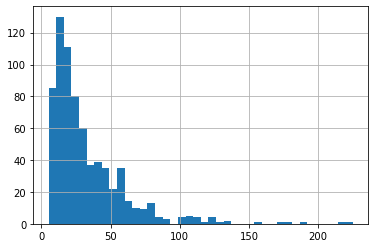

In [37]:
df_produits['price'].hist(bins=40)